In [11]:
# import library
import pandas as pd
import sklearn.model_selection as ms
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as met
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df = df.copy()
# tampilkan 5 data teratas
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [3]:
# melihat statistik data
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,NaN


In [4]:
# ubah nilai Classes ke dalam 0 dan 1 agar dapat dibaca oleh Scikit-Learn
classes = {"Classes": {"not fire": 0, "fire": 1}}
df.replace(classes, inplace=True)

<AxesSubplot:>

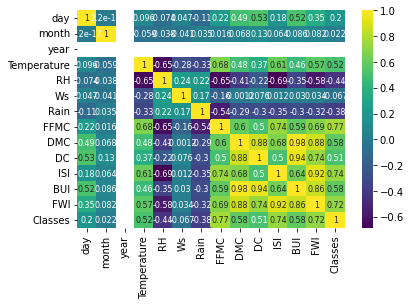

In [6]:
# melihat korelasi antar variabel
sns.heatmap(df.corr(), annot=True, cmap='viridis', annot_kws={'size': 8})

In [7]:
# drop atribut year karena semua kejadian pada tahun yang sama
# day dan month kita asumsikan keduanya tidak akan menjadi feature yang berguna
df = df.drop(['day', 'month', 'year'], axis=1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [13]:
df['Rain'] = df['Rain'].astype(int)
df['FFMC'] = df['FFMC'].astype(int)
df['DMC'] = df['DMC'].astype(int)
df['DC'] = df['DC'].astype(int)
df['ISI'] = df['ISI'].astype(int)
df['BUI'] = df['BUI'].astype(int)
df['FWI'] = df['FWI'].astype(int)

In [84]:
# pecah data menjadi training dan testing
features = df.drop('Classes', axis=1, inplace=False)
label = df['Classes']

# training 0.8, testing 0.2
X_train1, X_test1, y_train1, y_test1 = ms.train_test_split(features, label, test_size=0.2, random_state=0)
# training 0.7, testing 0.3
X_train2, X_test2, y_train2, y_test2 = ms.train_test_split(features, label, test_size=0.3, random_state=0)

In [85]:
# learning rate 0.05
clf1 = MLPClassifier(learning_rate_init=0.05, max_iter=300, activation='relu')
# learning rate 0.1
clf2 = MLPClassifier(learning_rate_init=0.1, max_iter=300, activation='relu')

# Percobaan pertama
VT = 8/2
LR = 0.05

In [93]:
clf1.fit(X_train1, y_train1)

MLPClassifier(learning_rate_init=0.05, max_iter=300)

In [94]:
y_prediksi1 = clf1.predict(X_test1)
accuracy1 = met.accuracy_score(y_test1, y_prediksi1)
error1 = met.mean_absolute_error(y_test1, y_prediksi1)

Visualisasi training error curve dengan VT = 8/2 dan LR = 0.05


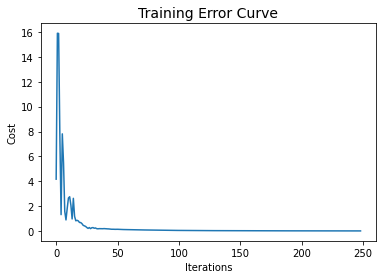

Accuracy: 97.959%, Average Training Error:, 2.041%


In [95]:
# Visualisasi
print("Visualisasi training error curve dengan VT = 8/2 dan LR = 0.05")
plt.plot(clf1.loss_curve_)
plt.title("Training Error Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(f"Accuracy: {(accuracy1*100):.3f}%, Average Training Error:, {(error1*100):.3f}%")

# Percobaan kedua
VT = 8/2
LR = 0.1

In [131]:
clf2.fit(X_train1, y_train1)

MLPClassifier(learning_rate_init=0.1, max_iter=300)

In [132]:
y_prediksi2 = clf1.predict(X_test1)
accuracy2 = met.accuracy_score(y_test1, y_prediksi2)
error2 = met.mean_absolute_error(y_test1, y_prediksi2)

Visualisasi training error curve dengan VT = 8/2 dan LR = 0.1


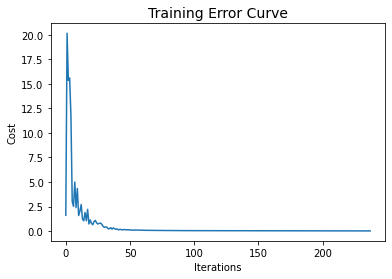

Accuracy: 95.918%, Average Training Error:, 4.082%


In [133]:
# Visualisasi
print("Visualisasi training error curve dengan VT = 8/2 dan LR = 0.1")
plt.plot(clf2.loss_curve_)
plt.title("Training Error Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(f"Accuracy: {(accuracy2*100):.3f}%, Average Training Error:, {(error2*100):.3f}%")

# Percobaan ketiga
VT = 7/3
LR = 0.05

In [116]:
clf1.fit(X_train2, y_train2)

MLPClassifier(learning_rate_init=0.05, max_iter=300)

In [118]:
y_prediksi3 = clf1.predict(X_test2)
accuracy3 = met.accuracy_score(y_test2, y_prediksi3)
error3 = met.mean_absolute_error(y_test2, y_prediksi3)

Visualisasi training error curve dengan VT = 7/3 dan LR = 0.05


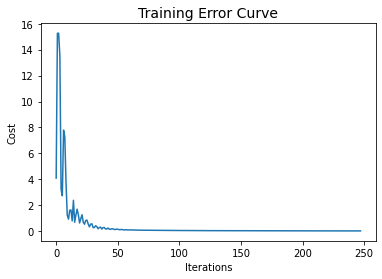

Accuracy: 94.595%, Average Training Error:, 5.405%


In [119]:
# Visualisasi
print("Visualisasi training error curve dengan VT = 7/3 dan LR = 0.05")
plt.plot(clf1.loss_curve_)
plt.title("Training Error Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(f"Accuracy: {(accuracy3*100):.3f}%, Average Training Error:, {(error3*100):.3f}%")

# Percobaan keempat
VT = 7/3
LR = 0.1

In [120]:
clf2.fit(X_train2, y_train2)

MLPClassifier(learning_rate_init=0.1, max_iter=300)

In [121]:
y_prediksi4 = clf2.predict(X_test2)
accuracy4 = met.accuracy_score(y_test2, y_prediksi4)
error4 = met.mean_absolute_error(y_test2, y_prediksi4)

Visualisasi training error curve dengan VT = 7/3 dan LR = 0.05


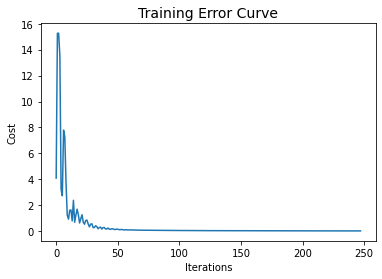

Accuracy: 86.486%, Average Training Error:, 13.514%


In [123]:
# Visualisasi
print("Visualisasi training error curve dengan VT = 7/3 dan LR = 0.05")
plt.plot(clf1.loss_curve_)
plt.title("Training Error Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(f"Accuracy: {(accuracy4*100):.3f}%, Average Training Error:, {(error4*100):.3f}%")

# AKURASI TERTINGGI

In [135]:
# mencari akurasi tertinggi
accs = [accuracy1, accuracy2, accuracy3, accuracy4]
height_acc = accs[0]

for acc in accs:
    if acc > height_acc:
        height_acc = acc

In [136]:
print(f'Akurasi tertinggi dari seluruh percobaan: {(height_acc*100):.3f}%')

Akurasi tertinggi dari seluruh percobaan: 97.959%
